# CSCE 5380 Data Mining Final Project

# Title: Categorizing Car Insurance Claims: A Predictive Analysis Study

# Group 2:


Shashidhar Kalapatapu<br> (Team Representative) <br>
shashidharkalapatapu@my.unt.edu<br>
11545863<br>

Aditya Vadrevu<br>
adityavadrevu@my.unt.edu<br>
11601517<br>

Sai Teja Shaga<br>
saitejashaga@my.unt.edu <br>
11613473<br>

Meghana Vagdevi Korada<br>
meghanavagdevikorada@my.unt.edu <br>
11604477<br>

Gowtham Sai Lendhra Narayanam<br>
gowthamsailendhranarayanam@my.unt.edu <br>
11709752<br>

## Index ( update at the end)
* 1.[Importing Packages](#1)
* 2.[Dataset Loading](#2)
* 3.[Exploratory Data Analysis (EDA)](#3)
* 4.[Data Preprocessing](#4)
* 5.[Predictive Modeling](#5) 
* 6.[Hyperparameter Tuning](#6) 
* 7.[LGBM](#7) 
* 8.[Conclusion](#8)


<a id="1"></a>
## 1. Importing Packages

Install these packages using pip command

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2. Dataset Loading

The dataset has been taken from the kaggle Car Insurance Claim dataset
<br>
https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification/data?select=train.csv

Few Points regarding the dataset:

1. <b>The Dataset contains 44 Columns and 58592 Rows<b>
    
2. The Dataset contains policyholder details such as policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable (is_claim) indicating whether the policyholder files a claim in the next 6 months or not.

3. The last column <b>'is_claim' is the Target Variable. It's a binary data value - Whether the policyholder will file a claim in the next 6 months (0 - No , 1 - Yes)<b>

<br>

In [2]:
# Importing the train csv file

# the folder where the dataset and the project files reside
path = "C:/Users/admin/CSCE 5380 Data Mining Project/data/"

# lets load the train dataset into a dataframe called 'df'.
df = pd.read_csv(path + "train.csv")

# the first 5 rows of the dataframe 
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
# import test df
test_df = pd.read_csv(path + "test.csv")
test_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


<a id="3"></a>
## 3. Exploratory Data Analysis (EDA)

In [4]:
# Rows and Columns
df.shape

(58592, 44)

In [5]:
# Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Observations
There are No Missing Values in the dataset

In [7]:
# Statistical Distribution of the attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


### Observations
For population_density, there's a noticeably large difference between the 75% percentile and the max value
It could indicate the possibility of outliers.

Unique values of is_claim:  [0 1]
---------------------------


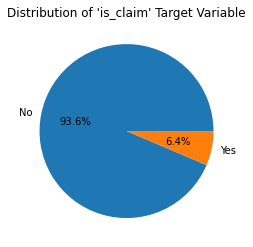

In [8]:
# Target Variable

print("Unique values of is_claim: ", df.is_claim.unique())

print("---------------------------")
target_spread = df.is_claim.value_counts()

fig, ax = plt.subplots()
plt.title("Distribution of 'is_claim' Target Variable")
ax.pie(target_spread.values, labels= ["No", "Yes"], autopct='%1.1f%%')

fig.show()

## Observations:
Only 6.4% of the policyholders filed an Insurance claim within 6 months.
There is a heavy Class Imbalance, we will come to this later

In [9]:
# Unique Values

df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [10]:
# Policy Id and Policy Tenure don't offer any useful information if all values are unique.
# Dropping these columns,
df.drop(['policy_id', 'policy_tenure'], axis= 1, inplace= True)
df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [11]:
# drop from test df as well
test_df.drop(['policy_id', 'policy_tenure'], axis= 1, inplace= True)
test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [12]:
# Let's seperate the Categorical and Numerical attributes for more detailed analysis

cat_cols=[]
num_cols=[]

for i in df.columns:
    total_unique_vals = len(df[i].unique())
    
    if total_unique_vals < 15:
        cat_cols.append(i)
        
    else:
        num_cols.append(i)


In [13]:
print(num_cols)

['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']


In [14]:
print(cat_cols)

['make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']


In [15]:
df.loc[:, num_cols]

,age_of_car,age_of_policyholder,area_cluster,population_density
0,0.05,0.644231,C1,4990
1,0.02,0.375000,C2,27003
2,0.02,0.384615,C3,4076
3,0.11,0.432692,C4,21622
4,0.11,0.634615,C5,34738
...,...,...,...,...
58587,0.13,0.644231,C8,8794
58588,0.02,0.519231,C14,7788
58589,0.05,0.451923,C5,34738
58590,0.14,0.557692,C8,8794


In [16]:
# area_cluster is not a numerical variable, add it to the categorical columns list.

num_cols.remove('area_cluster')
cat_cols.append('area_cluster')

In [17]:
df.loc[:, num_cols].head()

,age_of_car,age_of_policyholder,population_density
0,0.05,0.644231,4990
1,0.02,0.375000,27003
2,0.02,0.384615,4076
3,0.11,0.432692,21622
4,0.11,0.634615,34738


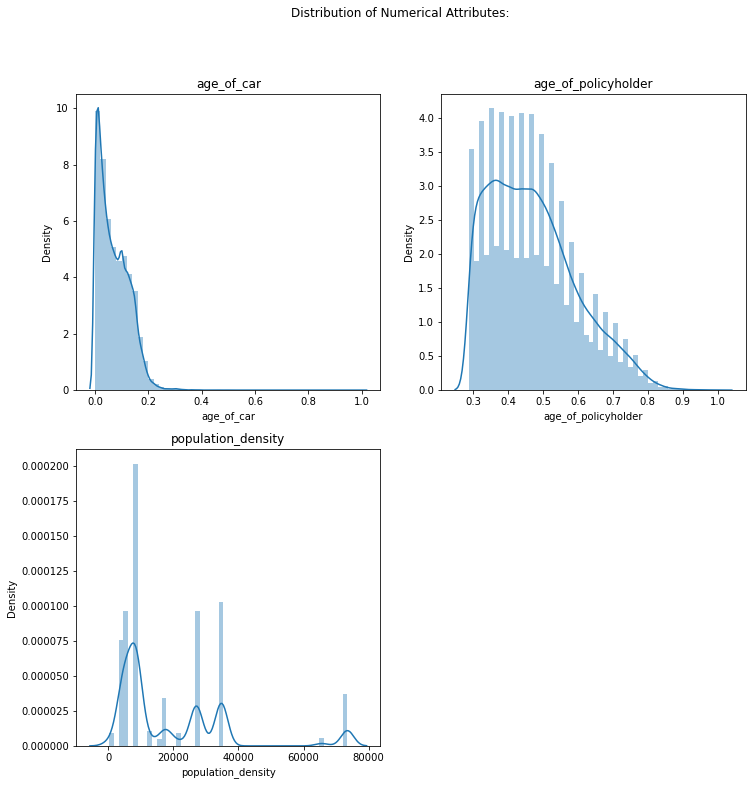

In [18]:
# Visualizing the distribution of Numerical Variables
plt.figure(figsize= (12, 12))
plt.suptitle("Distribution of Numerical Attributes:")

j = 1
for i in df.loc[:, num_cols]:
    plt.subplot(2, 2, j)
    sns.distplot(df[i])
    plt.title(i)
    j += 1

### Observations
<br>
1. The age_of_car column is heavily skewed to right. This implies that the majority of the cars are quite new and their age is less than 2-3 years.
<br><br>
2. The Age_of_policyholder is skewed to right as well. Possibly indicating that the most of the policyholders are in their teenage to mid 30 years.
<br><br>
3. The population densities have different peaks, Highest peaks indicating the most populated cities where the policyholders are from.
<br><br>

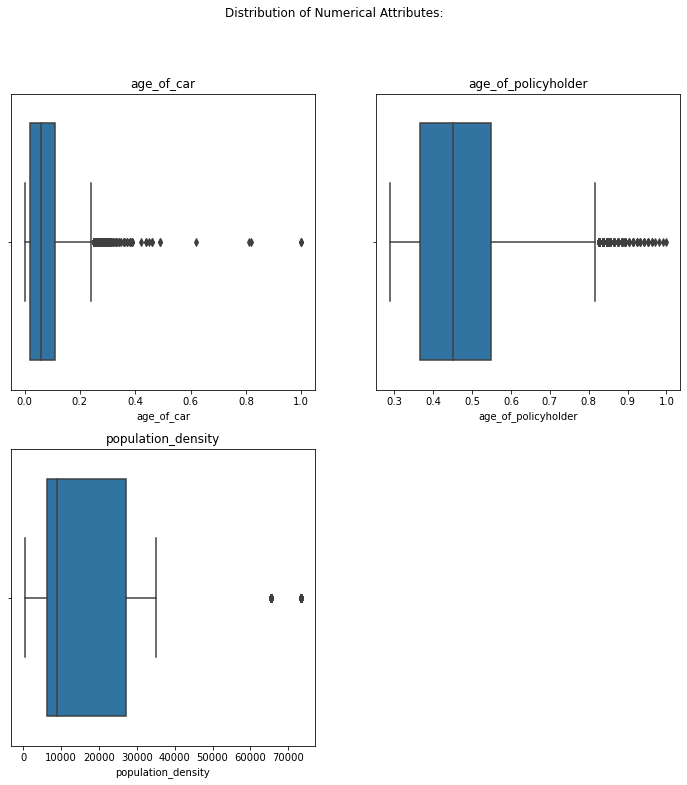

In [19]:
# Outlier Analysis

plt.figure(figsize= (12, 12))
plt.suptitle("Distribution of Numerical Attributes:")

j = 1
for i in df.loc[:, num_cols]:
    plt.subplot(2, 2, j)
    sns.boxplot(df[i])
    plt.title(i)
    j += 1

### Observations
<br>
1. For the age of car, there are quite a lot of outliers, however, as the data is also heavily right skewed, we can't discard all the outliers. Let's set the threshold as 0.6 for age_of_car and drop the age greater than 0.6, then we re-normalize the data with 0.6 as the maximum.
<br><br>
2. For the age_of_policyholder, the outliers are not that distant from the max. So, we will not drop them.
<br><br>
3. For the population_density, the data as seen before is not normalized. So no need to remove outliers here, we will simply normalize it.


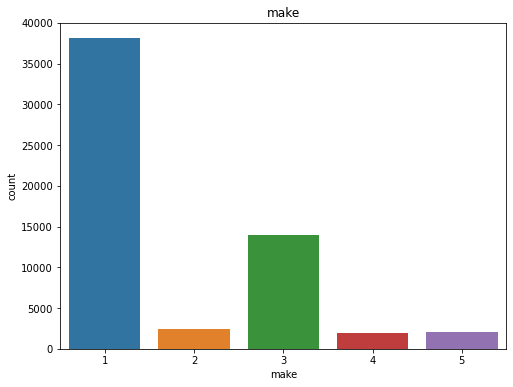

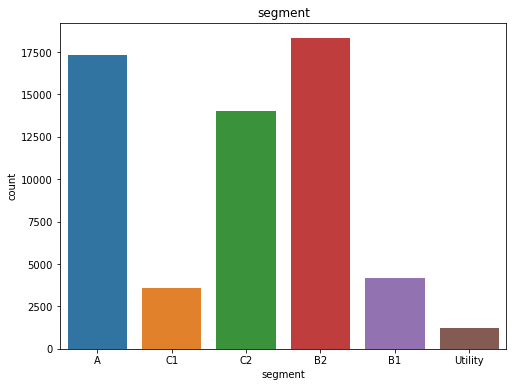

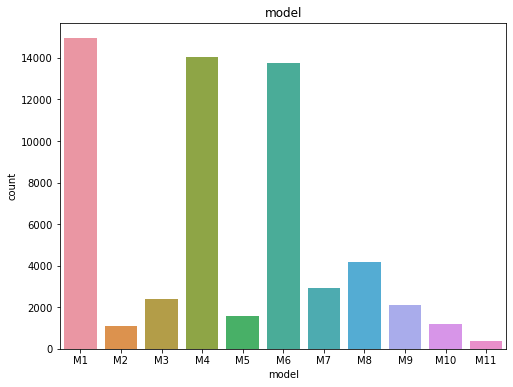

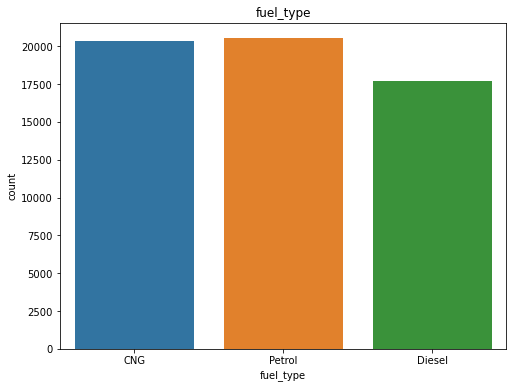

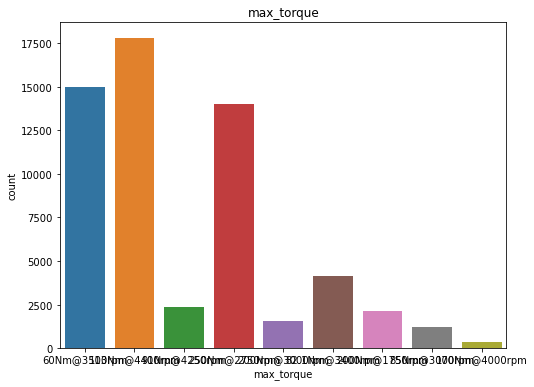

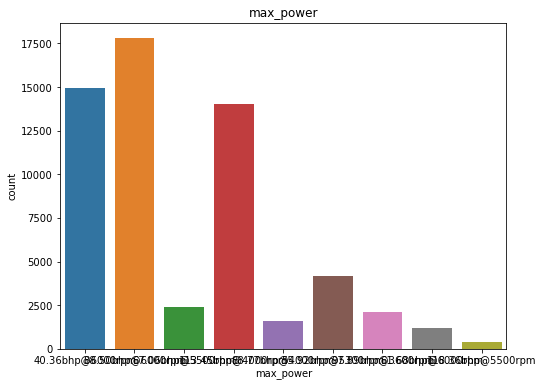

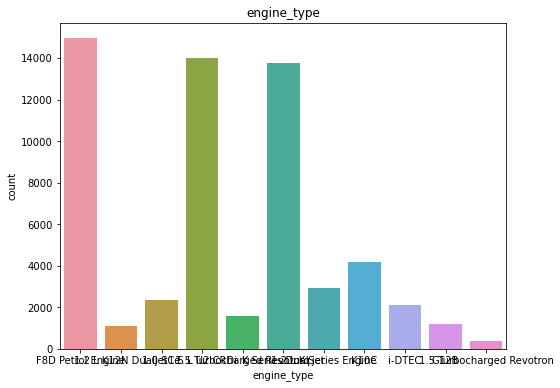

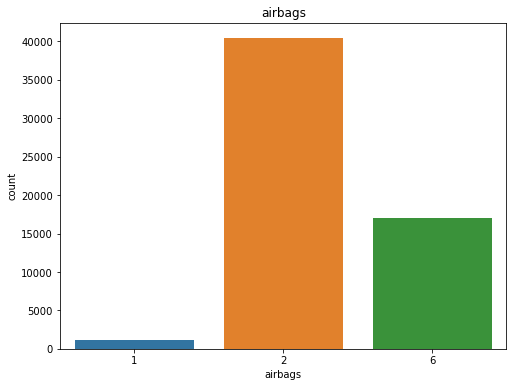

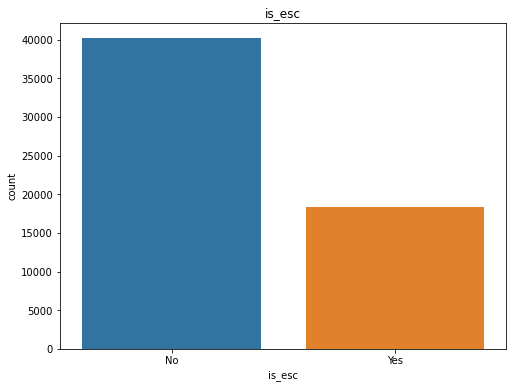

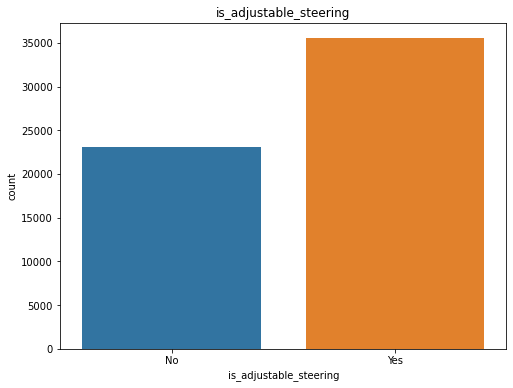

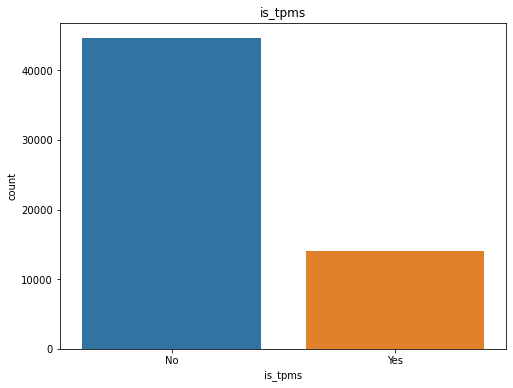

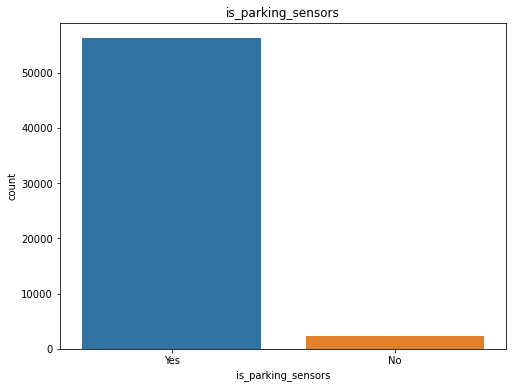

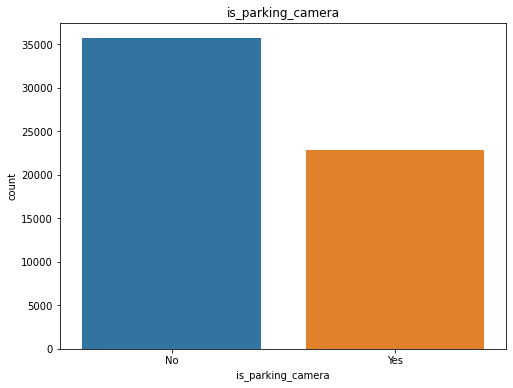

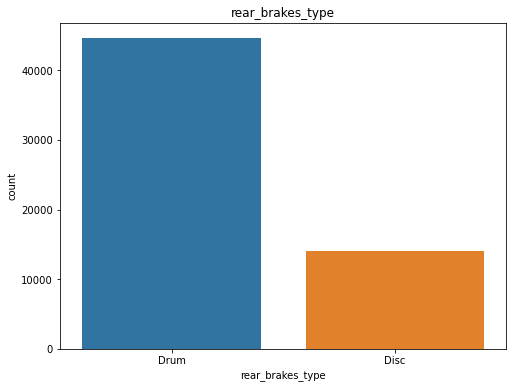

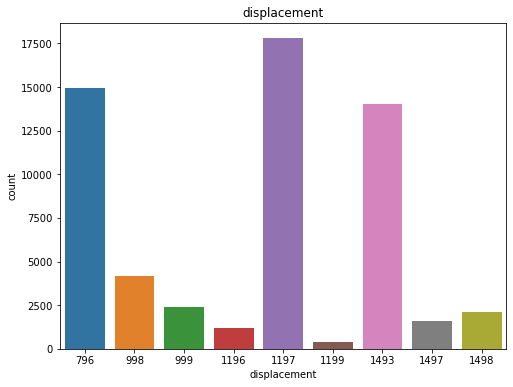

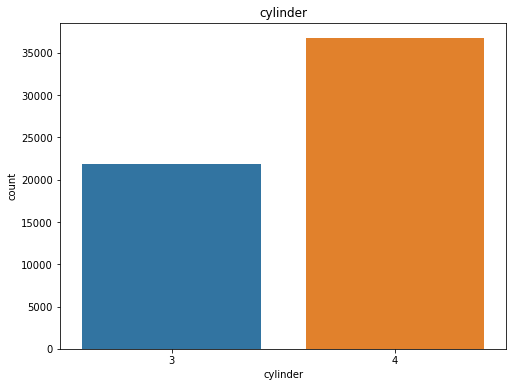

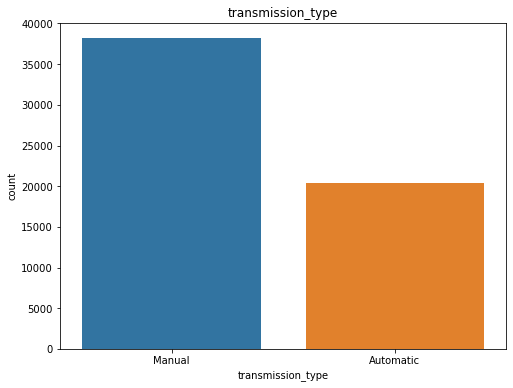

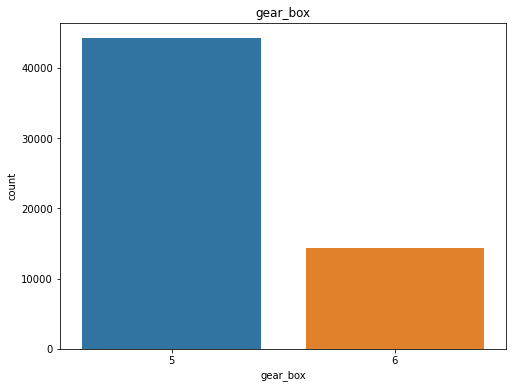

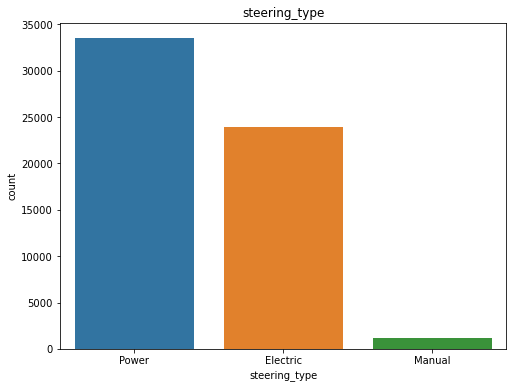

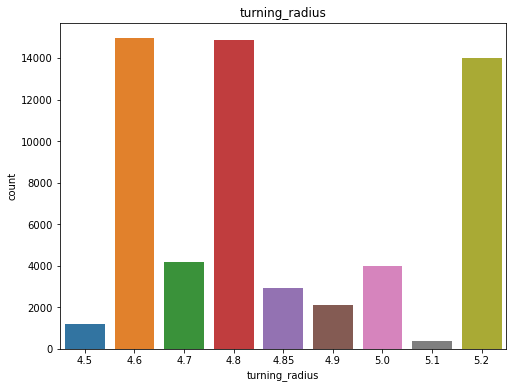

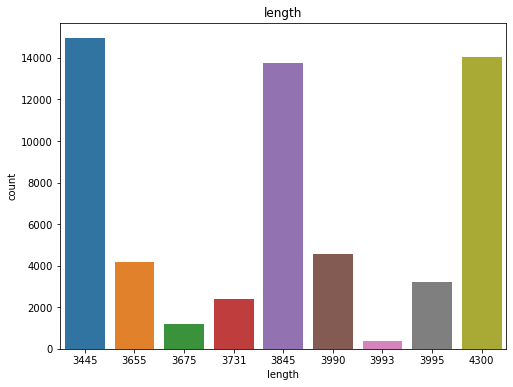

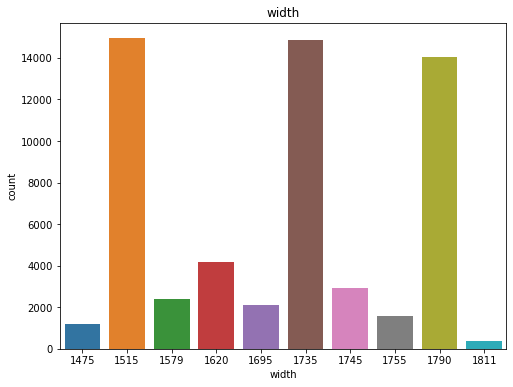

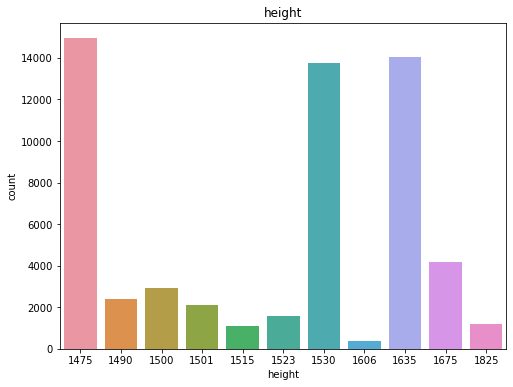

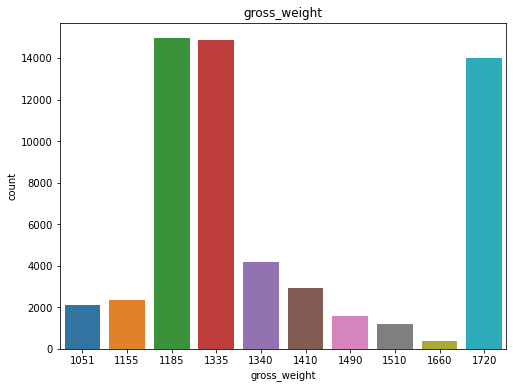

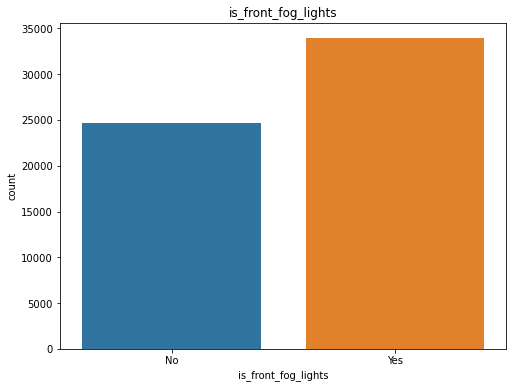

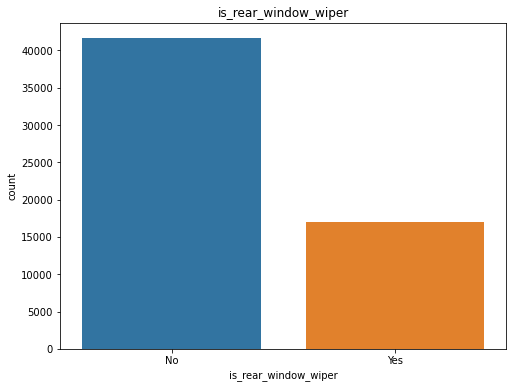

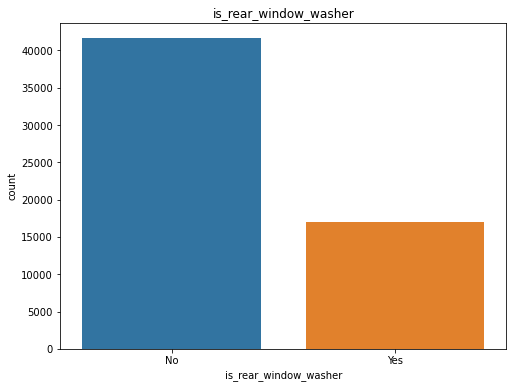

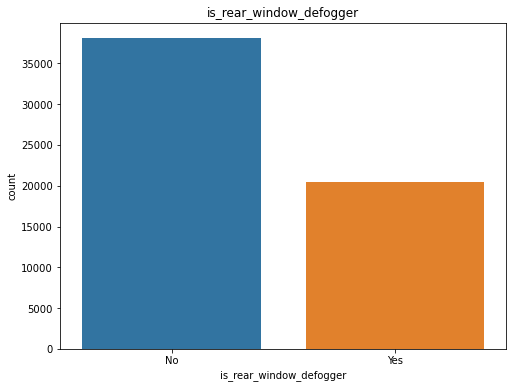

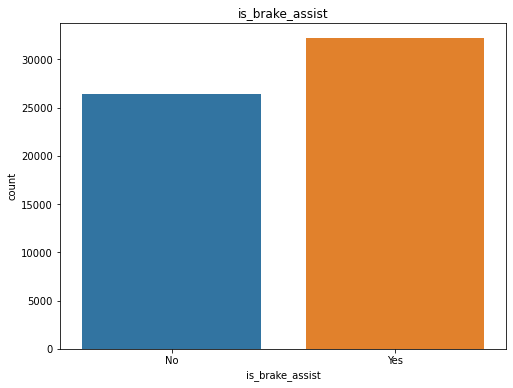

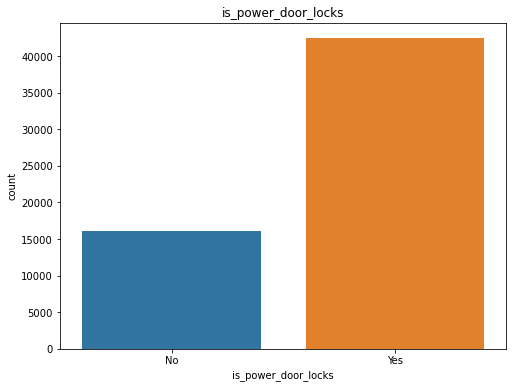

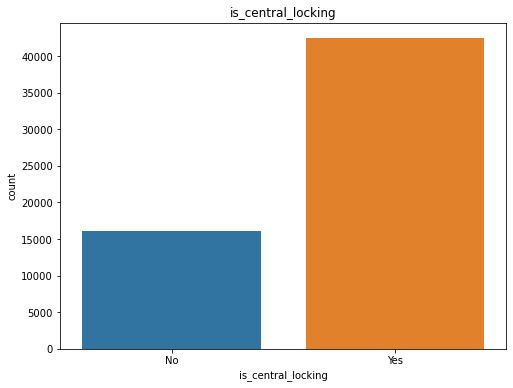

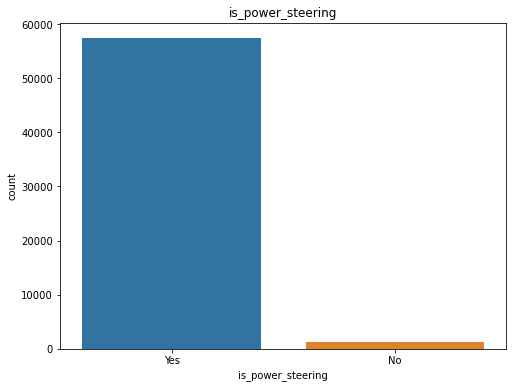

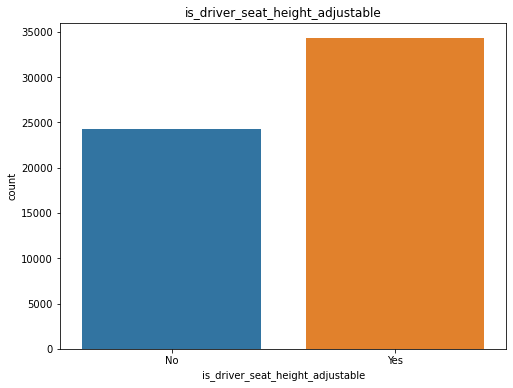

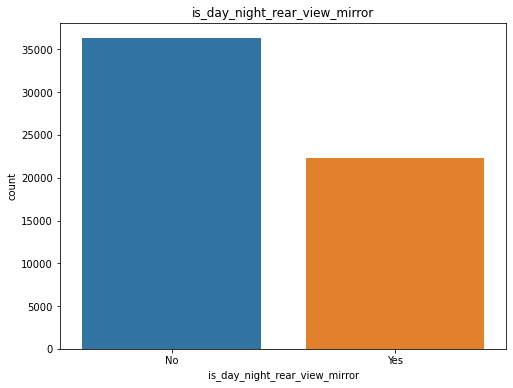

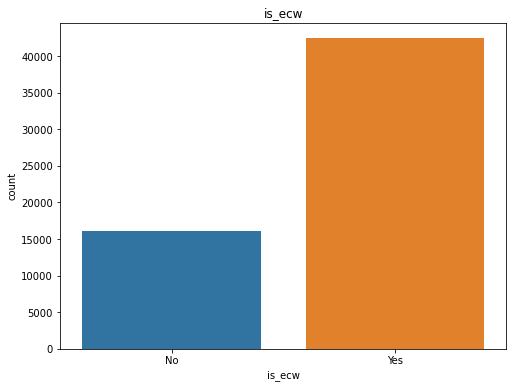

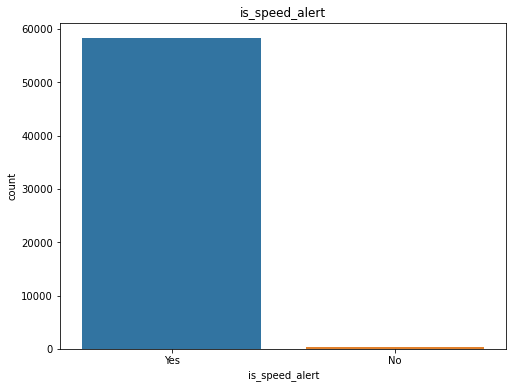

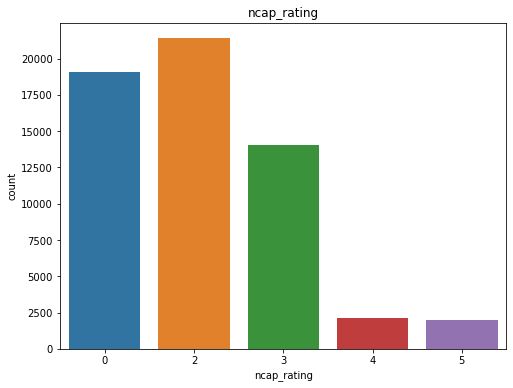

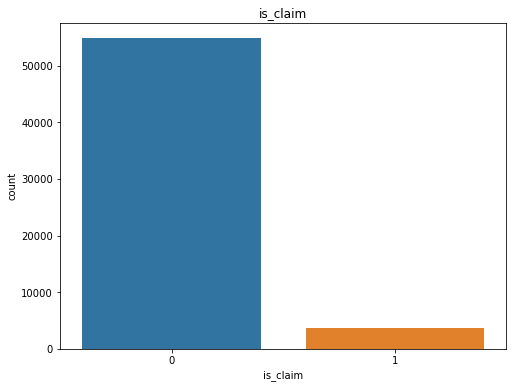

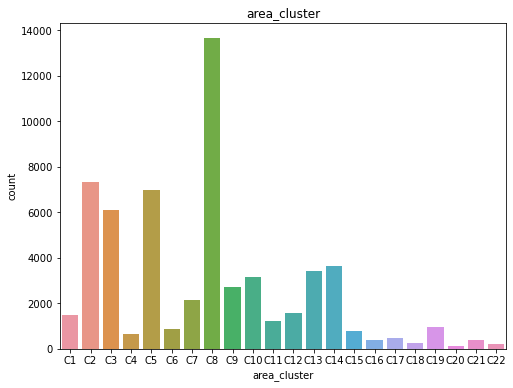

In [20]:
# categorical Analysis;

for i in cat_cols:
    
    plt.figure(figsize=(8,6))
    sns.countplot(x=i,data=df.loc[:,cat_cols])
    plt.title(i)

### Observations
Some columns have numerical data written inside strings, we will need to process this data

<a id="4"></a>
## 4. Data Preprocessing

### Handling Outliers and Normalizing Data

In [21]:
age_car_outlier_threshold = 0.6

# Filtering and dropping the rows of age_of_car
df = df[df['age_of_car'] <= age_car_outlier_threshold]

# Normalizing the age_of_car column with outlier threshold as the new maximum
df['age_of_car'] = df['age_of_car'] / age_car_outlier_threshold

df

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.083333,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.033333,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.033333,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.183333,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.183333,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.216667,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,0.033333,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,0.083333,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,0.233333,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [22]:
test_df['age_of_car'] = test_df['age_of_car'] / age_car_outlier_threshold

test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.000000,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.216667,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.200000,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.016667,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,0.033333,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [23]:
# Normalize Population_density
max_density = df['population_density'].max()
min_density = df['population_density'].min()

diff = max_density - min_density

df['population_density'] = (df['population_density'] - min_density) / diff
test_df['population_density'] = (test_df['population_density'] - min_density) / diff

df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.083333,0.644231,C1,0.064260,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.033333,0.375000,C2,0.365231,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.033333,0.384615,C3,0.051764,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.183333,0.432692,C4,0.291660,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.183333,0.634615,C5,0.470987,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [24]:
test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.000000,0.586538,C3,0.051764,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.216667,0.442308,C8,0.116270,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.200000,0.451923,C8,0.116270,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.016667,0.461538,C5,0.470987,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,0.033333,0.634615,C5,0.470987,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


### Processing Max torque column into numerical columns

In [25]:
df['max_torque'].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [26]:
# On train dataset
df[['max_torque_Nm', 'max_torque_rpm']] = df['max_torque'].str.split('@', expand=True)

df['max_torque_Nm'] = df['max_torque_Nm'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_torque_rpm'] = df['max_torque_rpm'].str.extract(r'(\d+)').astype(int)

df.drop(columns=['max_torque'], inplace=True)

df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm
0,0.083333,0.644231,C1,0.064260,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,60.0,3500
1,0.033333,0.375000,C2,0.365231,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,60.0,3500
2,0.033333,0.384615,C3,0.051764,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,60.0,3500
3,0.183333,0.432692,C4,0.291660,1,C1,M2,Petrol,88.50bhp@6000rpm,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400
4,0.183333,0.634615,C5,0.470987,2,A,M3,Petrol,67.06bhp@5500rpm,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250


In [27]:
test_df[['max_torque_Nm', 'max_torque_rpm']] = test_df['max_torque'].str.split('@', expand=True)

test_df['max_torque_Nm'] = test_df['max_torque_Nm'].str.extract(r'(\d+\.?\d*)').astype(float)
test_df['max_torque_rpm'] = test_df['max_torque_rpm'].str.extract(r'(\d+)').astype(int)

test_df.drop(columns=['max_torque'], inplace=True)

test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,engine_type,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm
0,0.000000,0.586538,C3,0.051764,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,Yes,No,No,No,Yes,0,60.0,3500
1,0.216667,0.442308,C8,0.116270,1,B2,M6,Petrol,88.50bhp@6000rpm,K Series Dual jet,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,113.0,4400
2,0.200000,0.451923,C8,0.116270,2,A,M3,Petrol,67.06bhp@5500rpm,1.0 SCe,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,91.0,4250
3,0.016667,0.461538,C5,0.470987,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,Yes,No,No,No,Yes,0,60.0,3500
4,0.033333,0.634615,C5,0.470987,1,A,M1,CNG,40.36bhp@6000rpm,F8D Petrol Engine,...,No,No,Yes,No,No,No,Yes,0,60.0,3500


In [28]:
df[['max_power_bhp', 'max_power_rpm']] = df['max_power'].str.split('@', expand=True)

df['max_power_bhp'] = df['max_power_bhp'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_power_rpm'] = df['max_power_rpm'].str.extract(r'(\d+)').astype(int)

df.drop(columns=['max_power'], inplace=True)
df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.083333,0.644231,C1,0.064260,1,A,M1,CNG,F8D Petrol Engine,2,...,No,No,No,Yes,0,0,60.0,3500,40.36,6000
1,0.033333,0.375000,C2,0.365231,1,A,M1,CNG,F8D Petrol Engine,2,...,No,No,No,Yes,0,0,60.0,3500,40.36,6000
2,0.033333,0.384615,C3,0.051764,1,A,M1,CNG,F8D Petrol Engine,2,...,No,No,No,Yes,0,0,60.0,3500,40.36,6000
3,0.183333,0.432692,C4,0.291660,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,...,Yes,Yes,Yes,Yes,2,0,113.0,4400,88.50,6000
4,0.183333,0.634615,C5,0.470987,2,A,M3,Petrol,1.0 SCe,2,...,No,Yes,Yes,Yes,2,0,91.0,4250,67.06,5500


In [29]:
test_df[['max_power_bhp', 'max_power_rpm']] = test_df['max_power'].str.split('@', expand=True)

test_df['max_power_bhp'] = test_df['max_power_bhp'].str.extract(r'(\d+\.?\d*)').astype(float)
test_df['max_power_rpm'] = test_df['max_power_rpm'].str.extract(r'(\d+)').astype(int)

test_df.drop(columns=['max_power'], inplace=True)

test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.000000,0.586538,C3,0.051764,1,A,M1,CNG,F8D Petrol Engine,2,...,Yes,No,No,No,Yes,0,60.0,3500,40.36,6000
1,0.216667,0.442308,C8,0.116270,1,B2,M6,Petrol,K Series Dual jet,2,...,Yes,Yes,Yes,Yes,Yes,2,113.0,4400,88.50,6000
2,0.200000,0.451923,C8,0.116270,2,A,M3,Petrol,1.0 SCe,2,...,Yes,No,Yes,Yes,Yes,2,91.0,4250,67.06,5500
3,0.016667,0.461538,C5,0.470987,1,A,M1,CNG,F8D Petrol Engine,2,...,Yes,No,No,No,Yes,0,60.0,3500,40.36,6000
4,0.033333,0.634615,C5,0.470987,1,A,M1,CNG,F8D Petrol Engine,2,...,Yes,No,No,No,Yes,0,60.0,3500,40.36,6000


### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

# Converts labels into numbers

df["max_torque_Nm"]=le.fit_transform(df["max_torque_Nm"])
df["max_torque_rpm"]=le.fit_transform(df["max_torque_rpm"])

df["max_power_bhp"]=le.fit_transform(df["max_power_bhp"])
df["max_power_rpm"]=le.fit_transform(df["max_power_rpm"])

df["engine_type"]=le.fit_transform(df["engine_type"])
df["area_cluster"]=le.fit_transform(df["area_cluster"])
df["model"]=le.fit_transform(df["model"])
df["engine_type"]=le.fit_transform(df["engine_type"])
df["transmission_type"]=le.fit_transform(df["transmission_type"])
df["segment"]=le.fit_transform(df["segment"])

In [32]:
df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.083333,0.644231,0,0.064260,1,0,0,CNG,6,2,...,No,No,No,Yes,0,0,0,4,0,4
1,0.033333,0.375000,11,0.365231,1,0,0,CNG,6,2,...,No,No,No,Yes,0,0,0,4,0,4
2,0.033333,0.384615,15,0.051764,1,0,0,CNG,6,2,...,No,No,No,Yes,0,0,0,4,0,4
3,0.183333,0.432692,16,0.291660,1,3,3,Petrol,2,2,...,Yes,Yes,Yes,Yes,2,0,4,7,4,4
4,0.183333,0.634615,17,0.470987,2,0,4,Petrol,0,2,...,No,Yes,Yes,Yes,2,0,3,6,3,3


In [33]:
test_df["max_torque_Nm"] = le.fit_transform(test_df["max_torque_Nm"])
test_df["max_torque_rpm"] = le.fit_transform(test_df["max_torque_rpm"])

test_df["max_power_bhp"] = le.fit_transform(test_df["max_power_bhp"])
test_df["max_power_rpm"] = le.fit_transform(test_df["max_power_rpm"])

test_df["engine_type"] = le.fit_transform(test_df["engine_type"])
test_df["area_cluster"] = le.fit_transform(test_df["area_cluster"])
test_df["model"] = le.fit_transform(test_df["model"])
test_df["engine_type"] = le.fit_transform(test_df["engine_type"])
test_df["transmission_type"] = le.fit_transform(test_df["transmission_type"])
test_df["segment"] = le.fit_transform(test_df["segment"])

test_df.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.000000,0.586538,15,0.051764,1,0,0,CNG,6,2,...,Yes,No,No,No,Yes,0,0,4,0,4
1,0.216667,0.442308,20,0.116270,1,2,7,Petrol,8,2,...,Yes,Yes,Yes,Yes,Yes,2,4,7,4,4
2,0.200000,0.451923,20,0.116270,2,0,4,Petrol,0,2,...,Yes,No,Yes,Yes,Yes,2,3,6,3,3
3,0.016667,0.461538,17,0.470987,1,0,0,CNG,6,2,...,Yes,No,No,No,Yes,0,0,4,0,4
4,0.033333,0.634615,17,0.470987,1,0,0,CNG,6,2,...,Yes,No,No,No,Yes,0,0,4,0,4


### One Hot Encoding

In [34]:
dummies = pd.get_dummies(df[["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert']])

df.drop(["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert'],axis=1,inplace=True)

df=pd.concat([df,dummies],axis=1)
df.head()


,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,airbags,displacement,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,0.083333,0.644231,0,0.064260,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1
1,0.033333,0.375000,11,0.365231,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1
2,0.033333,0.384615,15,0.051764,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1
3,0.183333,0.432692,16,0.291660,1,3,3,2,2,1197,...,0,1,0,1,0,1,0,1,0,1
4,0.183333,0.634615,17,0.470987,2,0,4,0,2,999,...,0,1,1,0,0,1,0,1,0,1


In [35]:
dummies = pd.get_dummies(test_df[["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert']])

test_df.drop(["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert'],axis=1,inplace=True)

test_df=pd.concat([test_df,dummies],axis=1)
test_df.head()


,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,airbags,displacement,...,is_power_steering_No,is_power_steering_Yes,is_driver_seat_height_adjustable_No,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_No,is_day_night_rear_view_mirror_Yes,is_ecw_No,is_ecw_Yes,is_speed_alert_No,is_speed_alert_Yes
0,0.000000,0.586538,15,0.051764,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1
1,0.216667,0.442308,20,0.116270,1,2,7,8,2,1197,...,0,1,0,1,0,1,0,1,0,1
2,0.200000,0.451923,20,0.116270,2,0,4,0,2,999,...,0,1,1,0,0,1,0,1,0,1
3,0.016667,0.461538,17,0.470987,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1
4,0.033333,0.634615,17,0.470987,1,0,0,6,2,796,...,0,1,1,0,1,0,1,0,0,1


### Correlation Analysis and Heatmaps

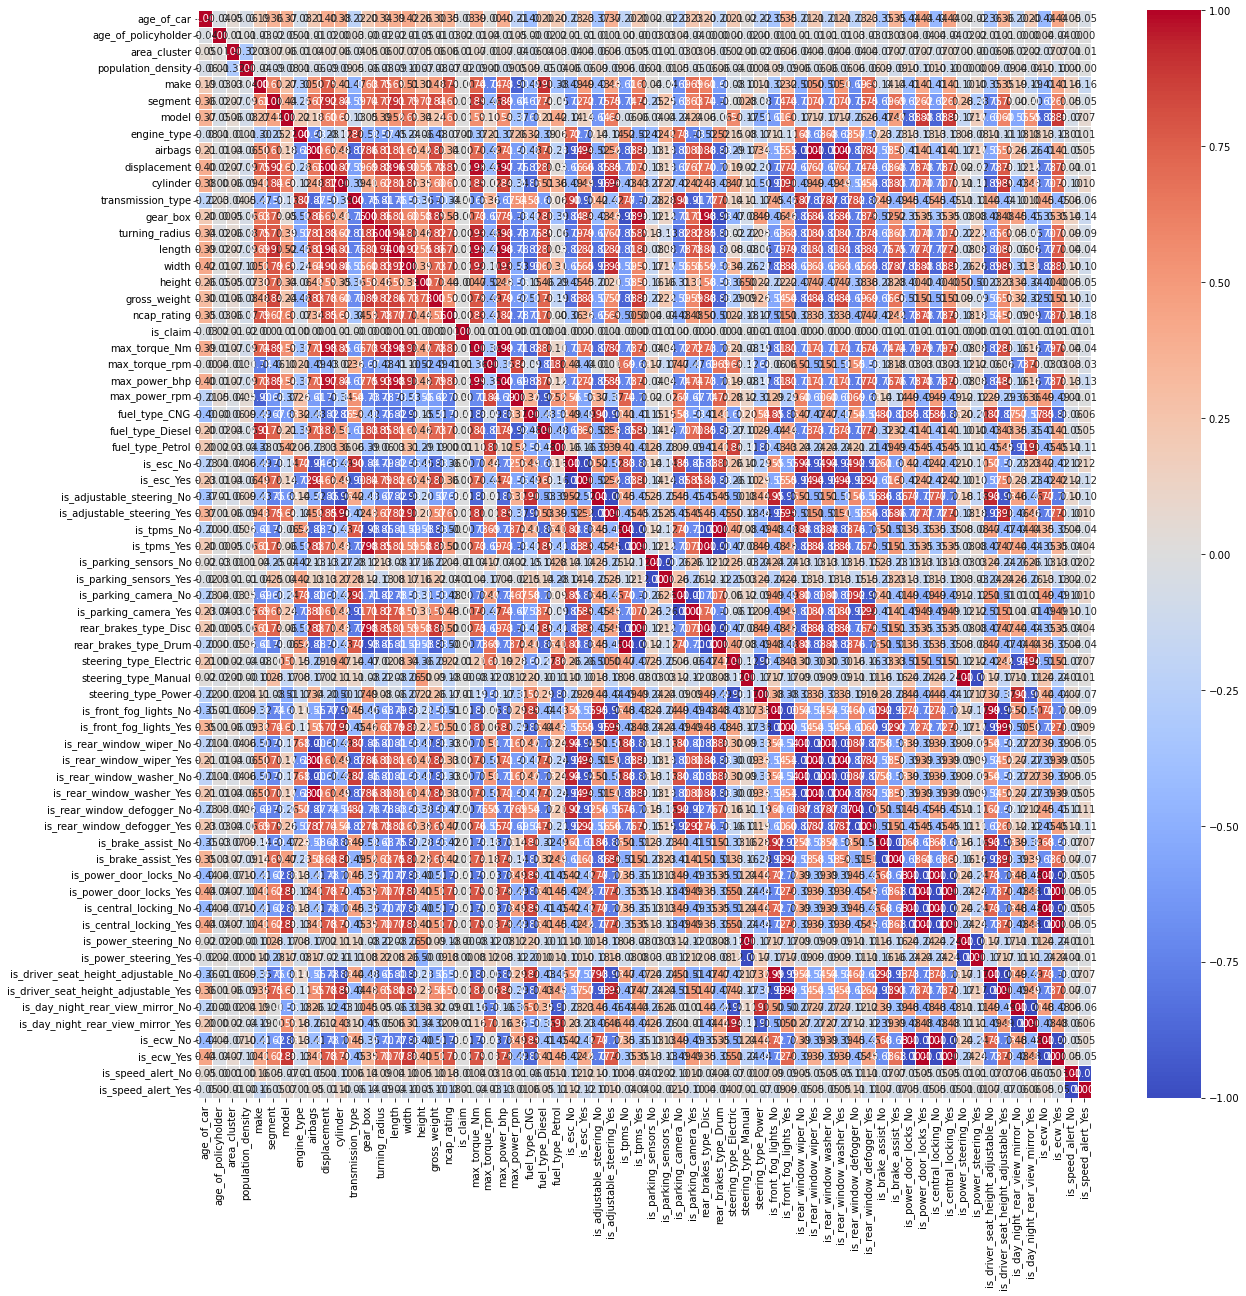

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [37]:
# Listing out Highly correlated variables

# We remove highly correlated variables to avoid unstable models and poor predictive performance

corr_df = df.corr(method="pearson")

high_correlation = abs( corr_df [ corr_df >= 0.9 ])
high_correlation[ high_correlation <= 1.0 ].stack().to_string()


'age_of_car                            age_of_car                              1.000000\nage_of_policyholder                   age_of_policyholder                     1.000000\narea_cluster                          area_cluster                            1.000000\npopulation_density                    population_density                      1.000000\nmake                                  make                                    1.000000\n                                      fuel_type_Diesel                        0.906608\nsegment                               segment                                 1.000000\n                                      displacement                            0.923359\n                                      length                                  0.909128\nmodel                                 model                                   1.000000\nengine_type                           engine_type                             1.000000\nairbags                        

In [38]:
corr_df = df.corr()["is_claim"].sort_values(ascending=False)
tmp = pd.DataFrame({"column": corr_df.index, "Correlation with is_claim": corr_df.values})
tmp

,column,Correlation with is_claim
0,is_claim,1.000000
1,age_of_policyholder,0.022451
2,is_adjustable_steering_Yes,0.013912
3,cylinder,0.013436
4,is_front_fog_lights_Yes,0.011821
...,...,...
61,is_brake_assist_No,-0.010891
62,is_front_fog_lights_No,-0.011821
63,is_adjustable_steering_No,-0.013912
64,population_density,-0.017828


In [39]:
tmp.loc[(tmp["column"]=='max_torque_Nm') | (tmp["column"]=='max_torque_rpm') | (tmp["column"]=='max_power_bhp') | (tmp["column"]=='max_power_rpm')]

,column,Correlation with is_claim
13,max_torque_Nm,0.007409
21,max_power_bhp,0.006397
23,max_torque_rpm,0.005422
34,max_power_rpm,0.001587


In [40]:
columns_to_drop = ["is_speed_alert_Yes","is_ecw_Yes","is_day_night_rear_view_mirror_Yes", 
                   "is_driver_seat_height_adjustable_No","is_power_steering_No",
                   "is_central_locking_Yes","is_power_door_locks_Yes","is_brake_assist_Yes",
                   "is_rear_window_defogger_Yes","is_rear_window_washer_Yes","is_front_fog_lights_Yes",
                   "rear_brakes_type_Disc","is_parking_camera_No","is_parking_sensors_No",
                   "is_tpms_Yes","is_adjustable_steering_Yes","is_esc_No","is_rear_window_wiper_Yes",
                   "segment","rear_brakes_type_Drum","is_adjustable_steering_No",
                   "is_rear_window_wiper_Yes","is_front_fog_lights_No","steering_type_Power",
                   "length","is_ecw_No","is_central_locking_No","airbags","make",
                   "max_power_rpm","transmission_type","transmission_type",
                   "gear_box","fuel_type_Diesel","is_power_door_locks_No",
                   "is_rear_window_washer_No","is_rear_window_washer_No",
                   "steering_type_Manual","is_day_night_rear_view_mirror_No",
                   "displacement","fuel_type_CNG","is_brake_assist_No",
                   "is_rear_window_wiper_No","is_rear_window_defogger_No",
]

df.drop(columns_to_drop, axis= 1, inplace=True)

test_df.drop(columns_to_drop, axis= 1, inplace=True)

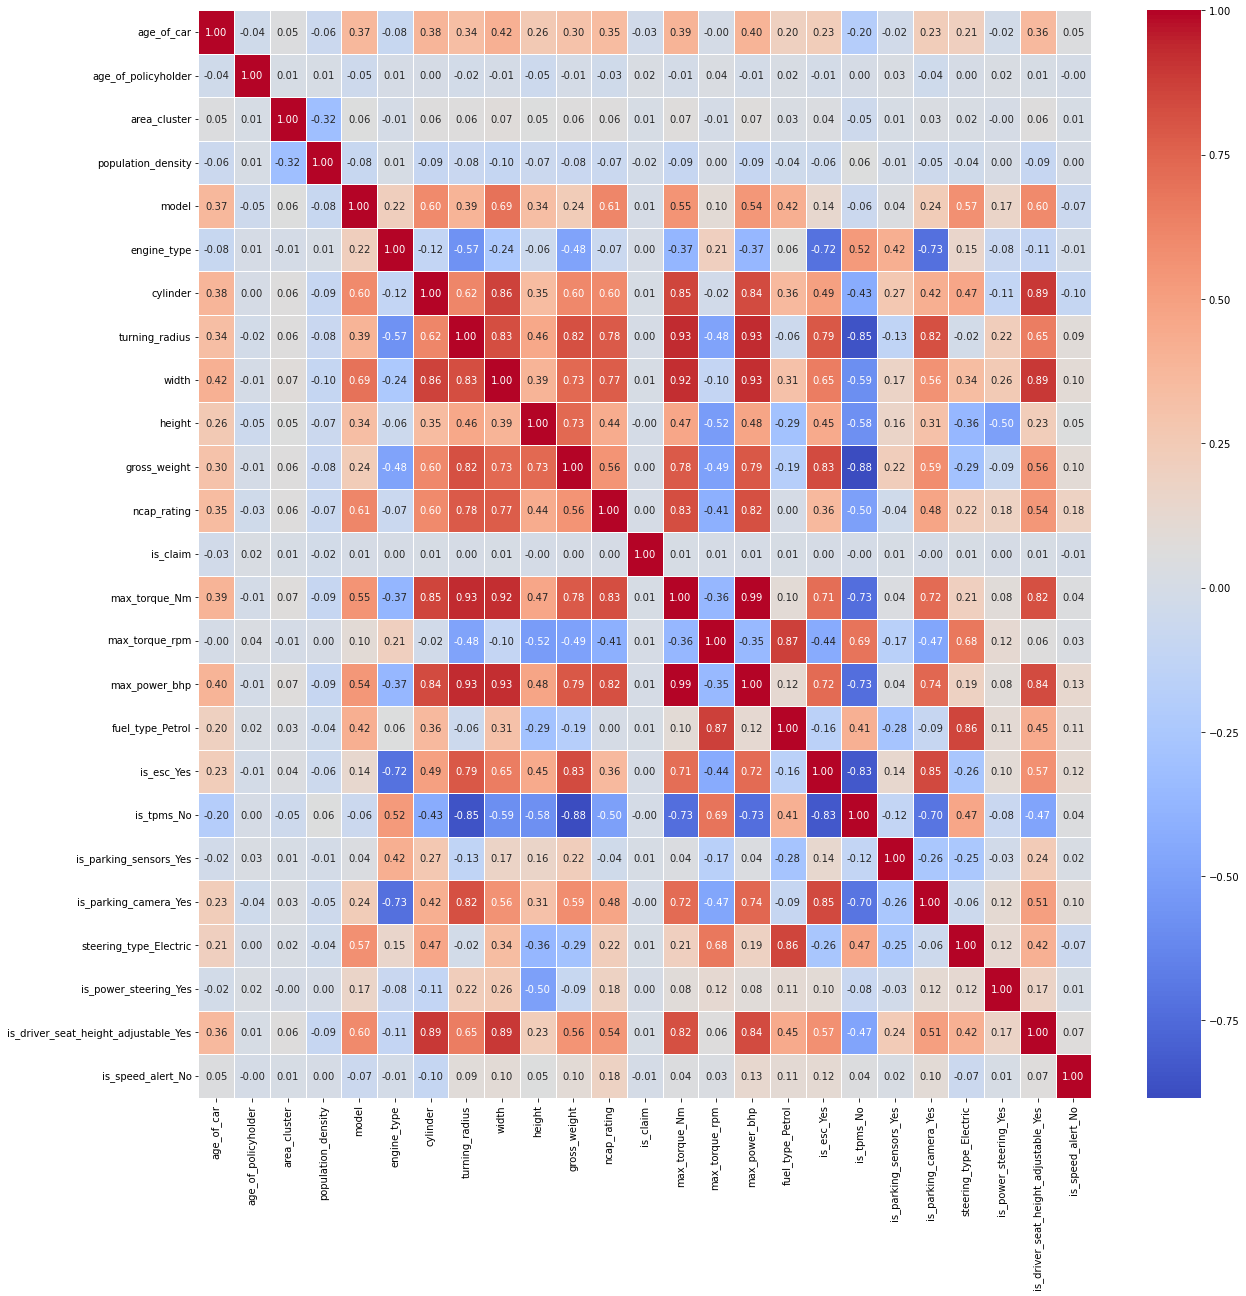

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [42]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


,column,Correlation with is_claim
0,is_claim,1.000000
1,age_of_policyholder,0.022451
2,cylinder,0.013436
3,is_driver_seat_height_adjustable_Yes,0.010682
4,width,0.009947
5,steering_type_Electric,0.009836
6,area_cluster,0.009435
7,is_parking_sensors_Yes,0.008425
8,max_torque_Nm,0.007409
9,fuel_type_Petrol,0.007243


In [43]:
## Reordering Dataframe columns for train and test datasets

In [44]:
list(df.columns)

['age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'model',
 'engine_type',
 'cylinder',
 'turning_radius',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'fuel_type_Petrol',
 'is_esc_Yes',
 'is_tpms_No',
 'is_parking_sensors_Yes',
 'is_parking_camera_Yes',
 'steering_type_Electric',
 'is_power_steering_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'is_speed_alert_No']

In [45]:
columns_order = ['age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'model',
 'engine_type',
 'cylinder',
 'turning_radius',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'fuel_type_Petrol',
 'is_esc_Yes',
 'is_tpms_No',
 'is_parking_sensors_Yes',
 'is_parking_camera_Yes',
 'steering_type_Electric',
 'is_power_steering_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'is_speed_alert_No',
 'is_claim']

df = df[columns_order]
df

,age_of_car,age_of_policyholder,area_cluster,population_density,model,engine_type,cylinder,turning_radius,width,height,...,fuel_type_Petrol,is_esc_Yes,is_tpms_No,is_parking_sensors_Yes,is_parking_camera_Yes,steering_type_Electric,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_speed_alert_No,is_claim
0,0.083333,0.644231,0,0.064260,0,6,3,4.6,1515,1475,...,0,0,1,1,0,0,1,0,0,0
1,0.033333,0.375000,11,0.365231,0,6,3,4.6,1515,1475,...,0,0,1,1,0,0,1,0,0,0
2,0.033333,0.384615,15,0.051764,0,6,3,4.6,1515,1475,...,0,0,1,1,0,0,1,0,0,0
3,0.183333,0.432692,16,0.291660,3,2,4,4.8,1735,1515,...,1,1,1,1,1,1,1,1,0,0
4,0.183333,0.634615,17,0.470987,4,0,3,5.0,1579,1490,...,1,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.216667,0.644231,20,0.116270,4,0,3,5.0,1579,1490,...,1,0,1,0,1,1,1,0,0,0
58588,0.033333,0.519231,5,0.102516,0,6,3,4.6,1515,1475,...,0,0,1,1,0,0,1,0,0,0
58589,0.083333,0.451923,17,0.470987,0,6,3,4.6,1515,1475,...,0,0,1,1,0,0,1,0,0,0
58590,0.233333,0.557692,20,0.116270,7,8,4,4.8,1735,1530,...,1,0,1,1,0,1,1,1,0,0


In [46]:
test_df = test_df[columns_order[:-1]]
test_df

,age_of_car,age_of_policyholder,area_cluster,population_density,model,engine_type,cylinder,turning_radius,width,height,...,max_power_bhp,fuel_type_Petrol,is_esc_Yes,is_tpms_No,is_parking_sensors_Yes,is_parking_camera_Yes,steering_type_Electric,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_speed_alert_No
0,0.000000,0.586538,15,0.051764,0,6,3,4.60,1515,1475,...,0,0,0,1,1,0,0,1,0,0
1,0.216667,0.442308,20,0.116270,7,8,4,4.80,1735,1530,...,4,1,0,1,1,0,1,1,1,0
2,0.200000,0.451923,20,0.116270,4,0,3,5.00,1579,1490,...,3,1,0,1,0,1,1,1,0,0
3,0.016667,0.461538,17,0.470987,0,6,3,4.60,1515,1475,...,0,0,0,1,1,0,0,1,0,0
4,0.033333,0.634615,17,0.470987,0,6,3,4.60,1515,1475,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.250000,0.740385,11,0.365231,7,8,4,4.80,1735,1530,...,4,1,0,1,1,0,1,1,1,0
39059,0.083333,0.509615,20,0.116270,5,3,4,5.20,1790,1635,...,7,0,1,0,1,1,0,1,1,0
39060,0.200000,0.355769,18,0.174474,8,1,4,4.85,1745,1500,...,4,1,1,1,1,1,1,1,1,0
39061,0.133333,0.644231,17,0.470987,3,2,4,4.80,1735,1515,...,4,1,1,1,1,1,1,1,1,0


<a id="5"></a>
## 5. Predictive Modeling

In [47]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [48]:
# Let's go with straightforward modeling, without any parameter tuning.

X = df.drop("is_claim",axis=1)
y = df["is_claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
# Define a function to train the classification models and return a dictionary of these models

def train_classification_models(X_train, y_train):
    
    # Logistic Regression
    logistic_reg = LogisticRegression().fit(X_train,y_train)

    # Bernoulli naive bayesian
    naive_bayes = BernoulliNB().fit(X_train,y_train)

    # K Nearest Neighbors 
    k_nearest = KNeighborsClassifier().fit(X_train,y_train)

    # Support Vector Machine Classifier
    support_vector = SVC().fit(X_train,y_train)

    # Multi-layer Perceptron Classifier
    mlp_nn = MLPClassifier().fit(X_train,y_train)

    # Decision Tree Classifier
    decision_tree = DecisionTreeClassifier().fit(X_train,y_train)

    # Random Forest Classifier
    random_for = RandomForestClassifier().fit(X_train,y_train)

    # ADA Boost Classifier
    ada_boost = AdaBoostClassifier().fit(X_train,y_train)

    # XGBoost Classifier
    xgb_boost = XGBClassifier().fit(X_train,y_train)

    # Gradient Boosting Classifier
    gbm_boost = GradientBoostingClassifier().fit(X_train,y_train)

    # Light GBM Classifier
    lgb_boost = LGBMClassifier().fit(X_train,y_train)

    # CAT Boost Classifier
    cat_boost = CatBoostClassifier().fit(X_train,y_train)
    
    model_dict = {
        "Logistic Regression": logistic_reg,
        "Naive Bayesian": naive_bayes,
        "K Nearest Neighbors": k_nearest,
        "Support Vector Machine": support_vector,
        "Multi-layer Perceptron Neural Network": mlp_nn,
        "Decision Tree": decision_tree,
        "Random Forest": random_for,
        "AdaBoost": ada_boost,
        "XGBoost": xgb_boost,
        "Gradient Boosting Machine": gbm_boost,
        "LightGBM": lgb_boost,
        "CatBoost": cat_boost
    }
    
    return model_dict

model_dict = train_classification_models(X_train, y_train)

[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
Learning rate set to 0.051812
0:	learn: 0.6343328	total: 21.9ms	remaining: 21.9s
1:	learn: 0.5832913	total: 42.3ms	remaining: 21.1s
2:	learn: 0.5388672	total: 64.4ms	remaining: 21.4s
3:	learn: 0.5002208	total: 101ms	remaining: 25.2s
4:	learn: 0.4666766	total: 122ms	remaining: 24.3s
5:	learn: 0.4365668	total: 144ms	remaining: 23.8s
6:	learn: 0.4113494	total: 159ms	remaining: 22.6s
7:	learn: 0.3894089	total: 177ms	remaining: 21.9s
8:	learn: 0.3702525	total: 200ms	remaining: 22s
9:	learn: 0.3536685	total: 

158:	learn: 0.2268906	total: 3.76s	remaining: 19.9s
159:	learn: 0.2268828	total: 3.79s	remaining: 19.9s
160:	learn: 0.2268613	total: 3.81s	remaining: 19.9s
161:	learn: 0.2268324	total: 3.83s	remaining: 19.8s
162:	learn: 0.2268045	total: 3.85s	remaining: 19.8s
163:	learn: 0.2267878	total: 3.88s	remaining: 19.8s
164:	learn: 0.2267494	total: 3.9s	remaining: 19.7s
165:	learn: 0.2267121	total: 3.92s	remaining: 19.7s
166:	learn: 0.2266695	total: 3.94s	remaining: 19.6s
167:	learn: 0.2266497	total: 3.96s	remaining: 19.6s
168:	learn: 0.2265992	total: 3.98s	remaining: 19.6s
169:	learn: 0.2265987	total: 4s	remaining: 19.6s
170:	learn: 0.2265924	total: 4.03s	remaining: 19.5s
171:	learn: 0.2265386	total: 4.05s	remaining: 19.5s
172:	learn: 0.2265366	total: 4.07s	remaining: 19.5s
173:	learn: 0.2265214	total: 4.09s	remaining: 19.4s
174:	learn: 0.2264928	total: 4.12s	remaining: 19.4s
175:	learn: 0.2264823	total: 4.14s	remaining: 19.4s
176:	learn: 0.2264562	total: 4.16s	remaining: 19.4s
177:	learn: 0.22

324:	learn: 0.2220636	total: 7.79s	remaining: 16.2s
325:	learn: 0.2220534	total: 7.82s	remaining: 16.2s
326:	learn: 0.2219874	total: 7.84s	remaining: 16.1s
327:	learn: 0.2219596	total: 7.87s	remaining: 16.1s
328:	learn: 0.2219365	total: 7.9s	remaining: 16.1s
329:	learn: 0.2218990	total: 7.92s	remaining: 16.1s
330:	learn: 0.2218731	total: 7.94s	remaining: 16s
331:	learn: 0.2218373	total: 7.96s	remaining: 16s
332:	learn: 0.2218025	total: 7.98s	remaining: 16s
333:	learn: 0.2217644	total: 8.01s	remaining: 16s
334:	learn: 0.2217172	total: 8.03s	remaining: 15.9s
335:	learn: 0.2217044	total: 8.05s	remaining: 15.9s
336:	learn: 0.2216718	total: 8.07s	remaining: 15.9s
337:	learn: 0.2216371	total: 8.09s	remaining: 15.8s
338:	learn: 0.2215999	total: 8.11s	remaining: 15.8s
339:	learn: 0.2215749	total: 8.13s	remaining: 15.8s
340:	learn: 0.2215379	total: 8.15s	remaining: 15.8s
341:	learn: 0.2214962	total: 8.18s	remaining: 15.7s
342:	learn: 0.2214932	total: 8.2s	remaining: 15.7s
343:	learn: 0.2214759	

483:	learn: 0.2175736	total: 11.4s	remaining: 12.1s
484:	learn: 0.2175608	total: 11.4s	remaining: 12.1s
485:	learn: 0.2175285	total: 11.4s	remaining: 12.1s
486:	learn: 0.2175190	total: 11.5s	remaining: 12.1s
487:	learn: 0.2175096	total: 11.5s	remaining: 12s
488:	learn: 0.2174895	total: 11.5s	remaining: 12s
489:	learn: 0.2174491	total: 11.5s	remaining: 12s
490:	learn: 0.2174116	total: 11.6s	remaining: 12s
491:	learn: 0.2173833	total: 11.6s	remaining: 12s
492:	learn: 0.2173662	total: 11.6s	remaining: 11.9s
493:	learn: 0.2173449	total: 11.6s	remaining: 11.9s
494:	learn: 0.2173379	total: 11.7s	remaining: 11.9s
495:	learn: 0.2173213	total: 11.7s	remaining: 11.9s
496:	learn: 0.2173154	total: 11.7s	remaining: 11.8s
497:	learn: 0.2172619	total: 11.7s	remaining: 11.8s
498:	learn: 0.2172329	total: 11.8s	remaining: 11.8s
499:	learn: 0.2171909	total: 11.8s	remaining: 11.8s
500:	learn: 0.2171525	total: 11.8s	remaining: 11.8s
501:	learn: 0.2171216	total: 11.8s	remaining: 11.7s
502:	learn: 0.2171068	

644:	learn: 0.2136968	total: 15.3s	remaining: 8.4s
645:	learn: 0.2136874	total: 15.3s	remaining: 8.37s
646:	learn: 0.2136626	total: 15.3s	remaining: 8.35s
647:	learn: 0.2136452	total: 15.3s	remaining: 8.32s
648:	learn: 0.2136412	total: 15.3s	remaining: 8.3s
649:	learn: 0.2136219	total: 15.4s	remaining: 8.27s
650:	learn: 0.2135991	total: 15.4s	remaining: 8.25s
651:	learn: 0.2135892	total: 15.4s	remaining: 8.22s
652:	learn: 0.2135708	total: 15.4s	remaining: 8.2s
653:	learn: 0.2135545	total: 15.5s	remaining: 8.17s
654:	learn: 0.2135160	total: 15.5s	remaining: 8.15s
655:	learn: 0.2134863	total: 15.5s	remaining: 8.13s
656:	learn: 0.2134722	total: 15.5s	remaining: 8.1s
657:	learn: 0.2134418	total: 15.5s	remaining: 8.08s
658:	learn: 0.2134334	total: 15.6s	remaining: 8.05s
659:	learn: 0.2134151	total: 15.6s	remaining: 8.03s
660:	learn: 0.2133914	total: 15.6s	remaining: 8s
661:	learn: 0.2133802	total: 15.6s	remaining: 7.98s
662:	learn: 0.2133763	total: 15.6s	remaining: 7.95s
663:	learn: 0.21332

803:	learn: 0.2102760	total: 19.1s	remaining: 4.65s
804:	learn: 0.2102627	total: 19.1s	remaining: 4.63s
805:	learn: 0.2102284	total: 19.1s	remaining: 4.61s
806:	learn: 0.2102145	total: 19.2s	remaining: 4.58s
807:	learn: 0.2101879	total: 19.2s	remaining: 4.56s
808:	learn: 0.2101835	total: 19.2s	remaining: 4.53s
809:	learn: 0.2101387	total: 19.2s	remaining: 4.51s
810:	learn: 0.2100989	total: 19.2s	remaining: 4.48s
811:	learn: 0.2100806	total: 19.3s	remaining: 4.46s
812:	learn: 0.2100438	total: 19.3s	remaining: 4.43s
813:	learn: 0.2100262	total: 19.3s	remaining: 4.41s
814:	learn: 0.2100203	total: 19.3s	remaining: 4.39s
815:	learn: 0.2100099	total: 19.4s	remaining: 4.36s
816:	learn: 0.2099723	total: 19.4s	remaining: 4.34s
817:	learn: 0.2099644	total: 19.4s	remaining: 4.32s
818:	learn: 0.2099496	total: 19.4s	remaining: 4.29s
819:	learn: 0.2099185	total: 19.4s	remaining: 4.27s
820:	learn: 0.2099181	total: 19.5s	remaining: 4.24s
821:	learn: 0.2098814	total: 19.5s	remaining: 4.22s
822:	learn: 

965:	learn: 0.2069202	total: 22.7s	remaining: 800ms
966:	learn: 0.2068965	total: 22.7s	remaining: 776ms
967:	learn: 0.2068855	total: 22.8s	remaining: 753ms
968:	learn: 0.2068610	total: 22.8s	remaining: 729ms
969:	learn: 0.2068250	total: 22.8s	remaining: 706ms
970:	learn: 0.2067876	total: 22.8s	remaining: 682ms
971:	learn: 0.2067718	total: 22.9s	remaining: 659ms
972:	learn: 0.2067443	total: 22.9s	remaining: 635ms
973:	learn: 0.2067211	total: 22.9s	remaining: 612ms
974:	learn: 0.2066958	total: 22.9s	remaining: 588ms
975:	learn: 0.2066885	total: 23s	remaining: 565ms
976:	learn: 0.2066732	total: 23s	remaining: 541ms
977:	learn: 0.2066488	total: 23s	remaining: 517ms
978:	learn: 0.2066466	total: 23s	remaining: 494ms
979:	learn: 0.2066243	total: 23s	remaining: 470ms
980:	learn: 0.2066032	total: 23.1s	remaining: 447ms
981:	learn: 0.2065709	total: 23.1s	remaining: 423ms
982:	learn: 0.2065597	total: 23.1s	remaining: 400ms
983:	learn: 0.2065484	total: 23.1s	remaining: 376ms
984:	learn: 0.2065430	

{'Logistic Regression': LogisticRegression(),
 'Naive Bayesian': BernoulliNB(),
 'K Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Machine': SVC(),
 'Multi-layer Perceptron Neural Network': MLPClassifier(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
       

In [59]:
model_accuracies = {}

def get_model_accuracy(model_name, pred_model):
    
    y_pred = pred_model.predict(X_test)
    
    model_accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = model_accuracy
    model_report = classification_report(y_test, y_pred)
    
    return model_accuracy, model_report

In [60]:
def model_result(model_dict):
    for model_name, model_value in model_dict.items():

        model_accuracy, model_report = get_model_accuracy(model_name, model_value)

        print("---------------------------------------------------")
        print("{} Accuracy : {}".format(model_name, model_accuracy))

        print()
        print("{} Classification Report: ".format(model_name))
        print(model_report)

    print("*******************************************")
    if(len(model_dict) > 1):
        highest_accuracy = max(model_accuracies.values())
        highest_accuracy_model = [model_name for model_name in model_accuracies if model_accuracies[model_name] == highest_accuracy][0]
        print("{} Model has the Highest Accuracy: {} ".format(highest_accuracy_model, highest_accuracy))

In [61]:
model_result(model_dict)

---------------------------------------------------
Logistic Regression Accuracy : 0.9339796545367652

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

---------------------------------------------------
Naive Bayesian Accuracy : 0.9339796545367652

Naive Bayesian Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

---------------------------------------------------
K Nearest 

### Observations:

With default parameters, we have achieved high accuracy for all models.
Highest accuracy is tied with Logistic Regression, Support Vector Classifier, MLP Classifier, Light GBM
<br>
<br>
However, this accuracy is based on predicting the majority class which is No on (is_claim)

Let's Handle the imbalance 

In [ ]:
# Don't run these HT code, too slow, need to reduce the search space
# Logistic Regression
logistic_params = {
    "penalty" : ["l1","l2"],
    "C" : [0.3,0.5,0.8,1],
    "solver" : ["lbfgs","liblinear"]
    
}

logistic_tuned = GridSearchCV(logistic_reg, logistic_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)


logistic_tuned.best_params_

# Training with best parameters
logistic_tuned_model = LogisticRegression(**logistic_tuned.best_params_).fit(X_train,y_train)

model_result({"Logistic Regression Tuned": logistic_tuned_model})

### SVC Classifier

svc_params = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3],
    'class_weight': [None, 'balanced']
}


svc_cv = GridSearchCV(support_vector, svc_params, cv=2, n_jobs=-1, verbose=2).fit(X_train,y_train)

svc_cv.best_params_

# Training with best parameters
svc_tuned = SVC(**svc_cv.best_params_).fit(X_train,y_train)

model_result({"Support Vector Classifier Tuned": svc_tuned})

### MLP Classifier

mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01],
    'learning_rate_init': [0.01, 0.1],
}

mlp_cv = GridSearchCV(mlp_nn, mlp_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

mlp_cv.best_params_mlp_nn

# Training with best parameters
mlp_tuned = MLPClassifierPClassifierP(**mlp_cv.best_params_).fit(X_train,y_train)

model_result({"Multilayer Perceptron Classifier Tuned": mlp_tuned})

### Light GBM

lgbm_params = {
    'n_estimators': [50, 1000]
    'num_leaves': [2, 50],
    'learning_rate': [0.05, 0.7],
    'max_depth': [2, 15, 9],
}


lgb_cv = GridSearchCV(lgb_boost, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

lgb_cv.best_params_

# Training with best parameters
lgb_tuned = LGBMClassifier(**lgb_cv.best_params_).fit(X_train,y_train)

model_result({"Multilayer Perceptron Classifier Tuned": lgb_tuned})

<a id="6"></a>
## 6. Handling Class Imbalance

### Original Class Count

In [63]:
# class count
class_count_0, class_count_1 = df['is_claim'].value_counts()

# Separate class
class_0 = df[df['is_claim'] == 0]
class_1 = df[df['is_claim'] == 1]

# print the shape of the class
print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

Class 0: (54838, 25)
Class 1: (3748, 25)


### 6.1 Random Undersampling

total class of 1 and 0: 
 1    3748
0    3748
Name: is_claim, dtype: int64


<AxesSubplot:title={'center':'is_claim Classes'}>

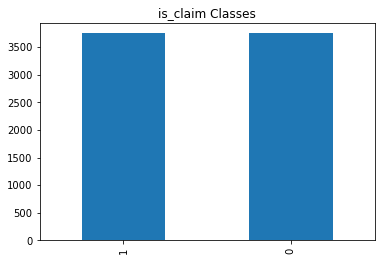

In [77]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0: \n", test_under['is_claim'].value_counts())# plot the count after under-sampeling
test_under['is_claim'].value_counts().plot(kind='bar', title='is_claim Classes')

In [78]:
# Let's model and check the metrics

X = test_under.drop("is_claim", axis=1)
y = test_under["is_claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model_dict = train_classification_models(X_train, y_train)

model_result(model_dict)

[LightGBM] [Info] Number of positive: 2812, number of negative: 2810
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 5622, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500178 -> initscore=0.000711
[LightGBM] [Info] Start training from score 0.000711
Learning rate set to 0.021535
0:	learn: 0.6923437	total: 9.64ms	remaining: 9.63s
1:	learn: 0.6914780	total: 20ms	remaining: 9.99s
2:	learn: 0.6906845	total: 30.5ms	remaining: 10.1s
3:	learn: 0.6897738	total: 40ms	remaining: 9.96s
4:	learn: 0.6888678	total: 50ms	remaining: 9.95s
5:	learn: 0.6881228	total: 59.8ms	remaining: 9.9s
6:	learn: 0.6873975	total: 69.5ms	remaining: 9.86s
7:	learn: 0.6865060	total: 78.5ms	remaining: 9.73s
8:	learn: 0.68594

168:	learn: 0.6531386	total: 1.56s	remaining: 7.66s
169:	learn: 0.6530695	total: 1.57s	remaining: 7.65s
170:	learn: 0.6530128	total: 1.58s	remaining: 7.64s
171:	learn: 0.6529725	total: 1.58s	remaining: 7.63s
172:	learn: 0.6528170	total: 1.59s	remaining: 7.63s
173:	learn: 0.6527426	total: 1.6s	remaining: 7.62s
174:	learn: 0.6525141	total: 1.61s	remaining: 7.61s
175:	learn: 0.6524329	total: 1.62s	remaining: 7.6s
176:	learn: 0.6523865	total: 1.63s	remaining: 7.59s
177:	learn: 0.6522936	total: 1.64s	remaining: 7.58s
178:	learn: 0.6521603	total: 1.65s	remaining: 7.57s
179:	learn: 0.6520815	total: 1.66s	remaining: 7.56s
180:	learn: 0.6519945	total: 1.67s	remaining: 7.55s
181:	learn: 0.6519400	total: 1.68s	remaining: 7.54s
182:	learn: 0.6518319	total: 1.69s	remaining: 7.53s
183:	learn: 0.6516499	total: 1.7s	remaining: 7.52s
184:	learn: 0.6515958	total: 1.71s	remaining: 7.51s
185:	learn: 0.6515233	total: 1.71s	remaining: 7.5s
186:	learn: 0.6514129	total: 1.72s	remaining: 7.49s
187:	learn: 0.65

340:	learn: 0.6401387	total: 3.14s	remaining: 6.07s
341:	learn: 0.6400425	total: 3.15s	remaining: 6.06s
342:	learn: 0.6399951	total: 3.16s	remaining: 6.05s
343:	learn: 0.6398549	total: 3.17s	remaining: 6.04s
344:	learn: 0.6398427	total: 3.18s	remaining: 6.03s
345:	learn: 0.6398026	total: 3.19s	remaining: 6.02s
346:	learn: 0.6397407	total: 3.2s	remaining: 6.02s
347:	learn: 0.6397179	total: 3.21s	remaining: 6.01s
348:	learn: 0.6396499	total: 3.21s	remaining: 6s
349:	learn: 0.6396259	total: 3.22s	remaining: 5.99s
350:	learn: 0.6395461	total: 3.23s	remaining: 5.98s
351:	learn: 0.6394512	total: 3.24s	remaining: 5.97s
352:	learn: 0.6393847	total: 3.25s	remaining: 5.96s
353:	learn: 0.6392950	total: 3.26s	remaining: 5.95s
354:	learn: 0.6391264	total: 3.27s	remaining: 5.94s
355:	learn: 0.6390327	total: 3.28s	remaining: 5.93s
356:	learn: 0.6389635	total: 3.29s	remaining: 5.92s
357:	learn: 0.6389174	total: 3.3s	remaining: 5.91s
358:	learn: 0.6388183	total: 3.31s	remaining: 5.9s
359:	learn: 0.6387

503:	learn: 0.6261324	total: 4.67s	remaining: 4.6s
504:	learn: 0.6259942	total: 4.68s	remaining: 4.59s
505:	learn: 0.6258848	total: 4.69s	remaining: 4.58s
506:	learn: 0.6256924	total: 4.71s	remaining: 4.58s
507:	learn: 0.6256678	total: 4.71s	remaining: 4.57s
508:	learn: 0.6256499	total: 4.72s	remaining: 4.56s
509:	learn: 0.6256267	total: 4.74s	remaining: 4.55s
510:	learn: 0.6256126	total: 4.74s	remaining: 4.54s
511:	learn: 0.6255323	total: 4.75s	remaining: 4.53s
512:	learn: 0.6254725	total: 4.76s	remaining: 4.52s
513:	learn: 0.6253595	total: 4.77s	remaining: 4.51s
514:	learn: 0.6252690	total: 4.78s	remaining: 4.5s
515:	learn: 0.6251371	total: 4.79s	remaining: 4.5s
516:	learn: 0.6249967	total: 4.8s	remaining: 4.49s
517:	learn: 0.6247838	total: 4.81s	remaining: 4.48s
518:	learn: 0.6247538	total: 4.82s	remaining: 4.47s
519:	learn: 0.6246931	total: 4.83s	remaining: 4.46s
520:	learn: 0.6245624	total: 4.84s	remaining: 4.45s
521:	learn: 0.6244511	total: 4.85s	remaining: 4.44s
522:	learn: 0.62

678:	learn: 0.6097920	total: 6.37s	remaining: 3.01s
679:	learn: 0.6097376	total: 6.38s	remaining: 3s
680:	learn: 0.6096746	total: 6.38s	remaining: 2.99s
681:	learn: 0.6096455	total: 6.39s	remaining: 2.98s
682:	learn: 0.6095864	total: 6.41s	remaining: 2.97s
683:	learn: 0.6094928	total: 6.42s	remaining: 2.96s
684:	learn: 0.6094135	total: 6.42s	remaining: 2.95s
685:	learn: 0.6093128	total: 6.43s	remaining: 2.94s
686:	learn: 0.6091944	total: 6.44s	remaining: 2.94s
687:	learn: 0.6091144	total: 6.45s	remaining: 2.93s
688:	learn: 0.6090873	total: 6.46s	remaining: 2.92s
689:	learn: 0.6089296	total: 6.47s	remaining: 2.91s
690:	learn: 0.6088610	total: 6.48s	remaining: 2.9s
691:	learn: 0.6088215	total: 6.49s	remaining: 2.89s
692:	learn: 0.6087517	total: 6.5s	remaining: 2.88s
693:	learn: 0.6086141	total: 6.51s	remaining: 2.87s
694:	learn: 0.6085688	total: 6.52s	remaining: 2.86s
695:	learn: 0.6085412	total: 6.53s	remaining: 2.85s
696:	learn: 0.6084824	total: 6.54s	remaining: 2.84s
697:	learn: 0.608

853:	learn: 0.5964750	total: 8.08s	remaining: 1.38s
854:	learn: 0.5964270	total: 8.09s	remaining: 1.37s
855:	learn: 0.5963603	total: 8.1s	remaining: 1.36s
856:	learn: 0.5963130	total: 8.11s	remaining: 1.35s
857:	learn: 0.5962358	total: 8.12s	remaining: 1.34s
858:	learn: 0.5962237	total: 8.13s	remaining: 1.33s
859:	learn: 0.5961227	total: 8.14s	remaining: 1.32s
860:	learn: 0.5960619	total: 8.15s	remaining: 1.32s
861:	learn: 0.5959698	total: 8.16s	remaining: 1.31s
862:	learn: 0.5959327	total: 8.17s	remaining: 1.3s
863:	learn: 0.5958516	total: 8.18s	remaining: 1.29s
864:	learn: 0.5957809	total: 8.19s	remaining: 1.28s
865:	learn: 0.5957459	total: 8.2s	remaining: 1.27s
866:	learn: 0.5957003	total: 8.21s	remaining: 1.26s
867:	learn: 0.5956749	total: 8.22s	remaining: 1.25s
868:	learn: 0.5955914	total: 8.23s	remaining: 1.24s
869:	learn: 0.5955226	total: 8.24s	remaining: 1.23s
870:	learn: 0.5954085	total: 8.25s	remaining: 1.22s
871:	learn: 0.5953009	total: 8.26s	remaining: 1.21s
872:	learn: 0.5

---------------------------------------------------
K Nearest Neighbors Accuracy : 0.5293489861259338

K Nearest Neighbors Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       938
           1       0.53      0.55      0.54       936

    accuracy                           0.53      1874
   macro avg       0.53      0.53      0.53      1874
weighted avg       0.53      0.53      0.53      1874

---------------------------------------------------
Support Vector Machine Accuracy : 0.4983991462113127

Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       938
           1       0.50      0.59      0.54       936

    accuracy                           0.50      1874
   macro avg       0.50      0.50      0.49      1874
weighted avg       0.50      0.50      0.49      1874

----------------------------------------------

### 6.2 Random Over-Sampling

total class of 1 and 0: 1    54838
0    54838
Name: is_claim, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

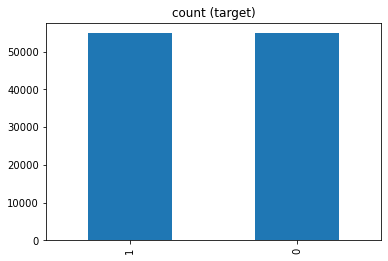

In [79]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['is_claim'].value_counts())# plot the count after under-sampeling
test_over['is_claim'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# Let's model and check the metrics

X = test_over.drop("is_claim", axis=1)
y = test_over["is_claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model_dict = train_classification_models(X_train, y_train)

model_result(model_dict)

In [ ]:
import imblearn
from collections import Counter

# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X = df.drop("is_claim",axis=1)
y = df["is_claim"]
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.25, random_state=0)

model_dict = train_classification_models(X_train, y_train)

model_result(model_dict)

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X = df.drop("is_claim",axis=1)
y = df["is_claim"]

X_ros, y_ros = ros.fit_resample(X, y)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=0)

model_dict = train_classification_models(X_train, y_train)

model_result(model_dict)